# 
<font face="华文行楷" size=10 >蒙特卡洛方法·二 (Monte Carlo method)</font> 
## [>](https://github.com/HUSKYzjh/ke_xue_bian_cheng)`翟家辉 19720212203881`

---------------------
________________________
<font size=6><div align='center'> **------------------------目录------------------------**</div></font>


## &#x2705; 壹 · 均匀采样计算
 
## &#x2705; 贰 · 马尔科夫链计算

## &#x2705; 叁 · 周期边条下马尔科夫链计算

## &#x2705; 肆 · 结语



---------
--------
# 一 · 均匀采样计算

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.widgets import SpanSelector
import matplotlib.gridspec as gridspec
import random

plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

# > *`采样示意 `*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.widgets import SpanSelector
import matplotlib.gridspec as gridspec
import random

plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号
def main(R,N):
    s=4*R**2
    random.seed()
    x=np.zeros(N)
    y=np.zeros(N)
    M=0
    
    #绘制圆
    beta = np.arange(0,2*np.pi,0.001)
    x0=R*np.cos(beta)
    y0=R*np.sin(beta)
    plt.figure(figsize=(15,15)) 
    plt.plot(x0,y0,"r",label="圆")

    for i in range(N):
        x[i]=random.uniform(-R,R)
        y[i]=random.uniform(-R,R)
        if x[i]**2+y[i]**2<=R**2:
            M+=1
    plt.scatter(x,y,s=0.03,c="black",label="采样点")
    plt.title("均匀取样")
    plt.xlabel("X",size=15)
    plt.ylabel("Y",size=15)
    plt.legend(loc='upper right',fontsize=18)
    print("采样圆面积：",M/N*s,'实际为',s/4*np.pi)
    print("计算得圆周率：{0:.10f}".format(M/N*4))
        
widgets.interact(
    main,
    R=widgets.FloatSlider(min=0.001,max=100,step=0.001,value=1,description="半径"),
    N=widgets.IntSlider(min=1000,max=100000,step=1000,value=10000,description="采样数"),
)
        

interactive(children=(FloatSlider(value=1.0, description='半径', min=0.001, step=0.001), IntSlider(value=10000, …

<function __main__.main(R, N)>

# > *`测量方差与采样数 `*

In [1]:
#计算pi
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.widgets import SpanSelector
import matplotlib.gridspec as gridspec
import random

plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号
def main1(R,N):
    s=4*R**2
    random.seed()
    x=np.zeros(N)
    y=np.zeros(N)
    M=0
    
    for i in range(N):
        x[i]=random.uniform(-R,R)
        y[i]=random.uniform(-R,R)
        if x[i]**2+y[i]**2<=R**2:
            M+=1
    return M/N*4

#计算方差
def main11(R,N,n):
    pj=0
    shujv=[]
    for i in range(n):
        h=main1(R,N)
        pj=pj+h
        shujv.append(h)
    pj=pj/n
    fc=0
    for ii in shujv:
        fc=fc+(ii-pj)**2
    return fc

#柱状图    
def main12(R,N,n):
    xn=np.arange(1000,N,1000)
    yn=[]
    for iii in xn:
        yn.append(main11(R,iii,n))
    #print(xn,yn)
    plt.figure(figsize=(15,8))
    plt.bar(xn,yn,facecolor='grey', edgecolor='green',width=20,)
    for i in range(len(xn)):
        plt.text(xn[i], yn[i]*1.02, int(yn[i]*10000)/10000, fontsize=230/len(xn), horizontalalignment="center") 
    plt.ylim(0,1.1*max(yn))
    plt.title("采样数与方差",size=15)
    plt.xlabel("采样数",size=15)
    plt.ylabel('方差',size=15)
    plt.yticks(size=20,weight='bold')
    plt.xticks(size=18,weight='bold')
widgets.interact(
    main12,
    R=widgets.FloatSlider(min=0.001,max=100,step=0.001,value=1,description="半径"),
    N=widgets.IntSlider(min=1000,max=100000,step=1000,value=10000,description="采样数最大值"),
    n=widgets.IntSlider(min=1,max=100,step=1,value=10,description="每组组数"),
)
        

interactive(children=(FloatSlider(value=1.0, description='半径', min=0.001, step=0.001), IntSlider(value=10000, …

<function __main__.main12(R, N, n)>

# > *`测量方差与采样数 (参考线)`*

In [2]:
#计算pi
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.widgets import SpanSelector
import matplotlib.gridspec as gridspec
import random

plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号
def ma0(R,N):
    s=4*R**2
    random.seed()
    x=np.zeros(N)
    y=np.zeros(N)
    M=0
    
    for i in range(N):
        x[i]=random.uniform(-R,R)
        y[i]=random.uniform(-R,R)
        if x[i]**2+y[i]**2<=R**2:
            M+=1
    return M/N*4

#计算方差
def main01(R,N,n):
    pj=0
    shujv=[]
    for i in range(n):
        h=ma0(R,N)
        pj=pj+h
        shujv.append(h)
    pj=pj/n
    fc=0
    for ii in shujv:
        fc=fc+(ii-pj)**2

    return fc

#柱状图    
def main02(R,N1,N2,n):
    xn=np.arange(N1,N2,10)
    xz=np.linspace(N1,N2,1000)
    yn=[]
    for iii in xn:
        yn.append(main01(R,iii,n))
    #print(xn,yn)
    plt.figure(figsize=(15,8))
    plt.bar(xn,yn,facecolor='grey', edgecolor='green',width=0.01,label="方差")
    
#     for i in range(len(xn)):
#         plt.text(xn[i], yn[i]*1.02, int(yn[i]*10000)/10000, fontsize=230/len(xn), horizontalalignment="center") 

    plt.ylim(0,1.1*max(yn))
    plt.title("采样数与方差",size=15)
    plt.xlabel("采样数",size=15)
    plt.ylabel('方差',size=15)
    plt.plot(xz,1/np.sqrt(xz),c="c",label="参考线：$1/n$")
    plt.yticks(size=20,weight='bold')
    plt.xticks(size=18,weight='bold')
    plt.legend(loc='upper right',fontsize=20)
    plt.show()
widgets.interact(
    main02,
    R=widgets.FloatSlider(min=0.001,max=100,step=0.001,value=1,description="半径"),
    N1=widgets.IntSlider(min=1,max=10000,step=100,value=100,description="采样数最小值"),
    N2=widgets.IntSlider(min=100,max=20000,step=100,value=1000,description="采样数最大值"),
    n=widgets.IntSlider(min=1,max=100,step=1,value=10,description="每组组数"),
)
        

interactive(children=(FloatSlider(value=1.0, description='半径', min=0.001, step=0.001), IntSlider(value=100, de…

<function __main__.main02(R, N1, N2, n)>

># 例图
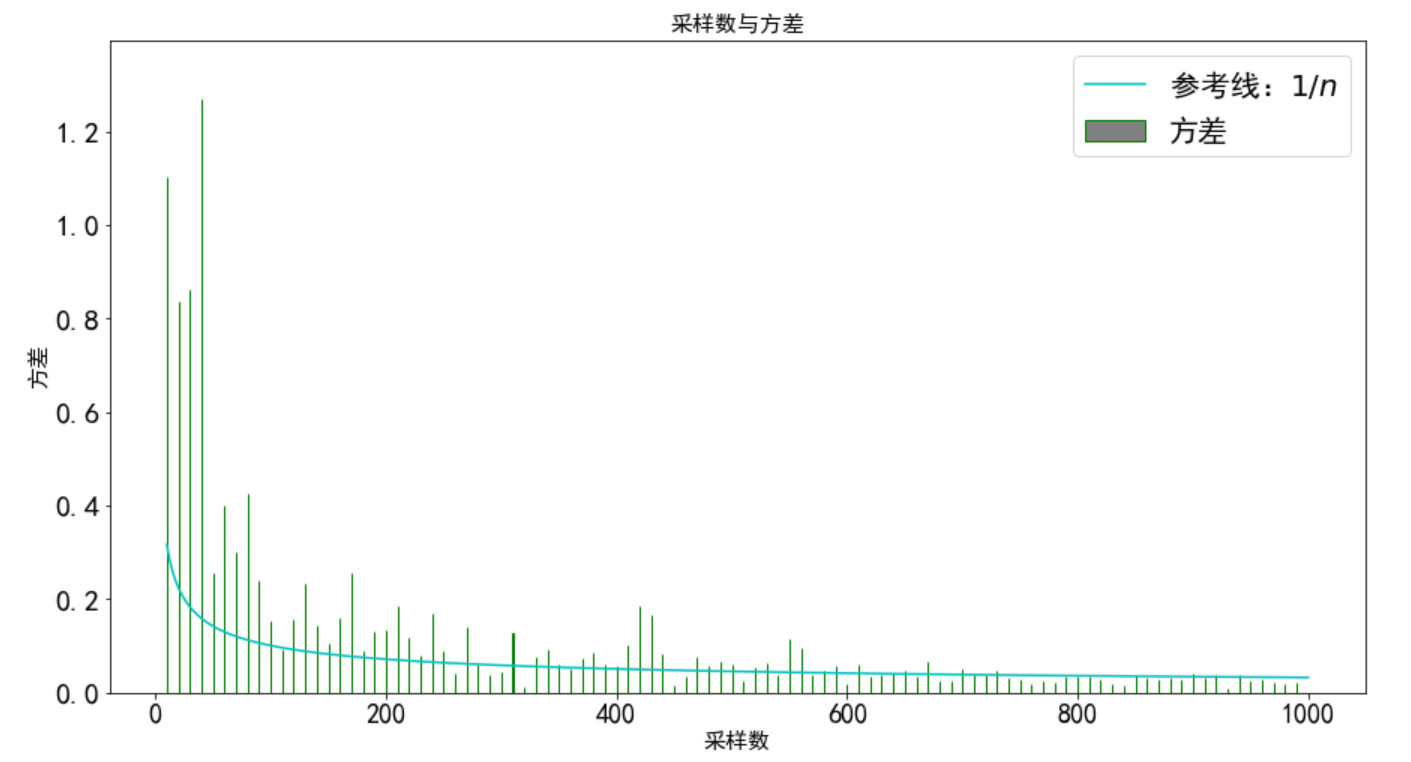
### 由统计学参数估计相关知识可知，样品平均数的方差小于总体方差，并与$\frac{1}{n}$成正比

---------
--------
# 二 · 马尔科夫链计算

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.widgets import SpanSelector
import matplotlib.gridspec as gridspec
import random

plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

# > *`示意图`*

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.widgets import SpanSelector
import matplotlib.gridspec as gridspec
import random

plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

def main1(R,N,s):
    random.seed()
    x=np.zeros(N)
    y=np.zeros(N)
    M=0
    t=0
    S=4*R**2
    SS=int(S/4*np.pi*1000)/1000
    #绘制圆
    beta = np.arange(0,2*np.pi,0.001)
    x0=R*np.cos(beta)
    y0=R*np.sin(beta)
    plt.figure(figsize=(20,20)) 
    plt.plot(x0,y0,"r",label=f"圆({SS})")

    #采样
    for i in range(1,N):
        x[i]=random.uniform(-1,1)*s+x[i-1]
        y[i]=random.uniform(-1,1)*s+y[i-1]
        
#         if x[i]<-R or x[i]>R:
#             x[i]=x[i-1]
#         if y[i]<-R or y[i]>R:
#             y[i]=y[i-1]
            
        if x[i]<-R or x[i]>R or y[i]<-R or y[i]>R:
            x[i]=x[i-1]
            y[i]=y[i-1]
            t+=1
            
        if x[i]**2+y[i]**2<=R**2:
            M+=1
    plt.scatter(x,y,s=0.03,c="black",label=f"采样点({int(M/N*S*1000)/1000})")
    plt.title("马尔科夫链",size=25)
    plt.xlabel("X",size=25)
    plt.ylabel("Y",size=25)

    plt.legend(loc='upper right',fontsize=28)
    print("采样得圆面积：",M/N*S,'实际为',S/4*np.pi)
    print("计算得圆周率：{0:.10f}".format(M/N*4))
    print("越界点数",t)
        
widgets.interact(
    main1,
    R=widgets.FloatSlider(min=1,max=100,step=0.001,value=1,description="半径"),
    N=widgets.IntSlider(min=1000,max=1000000,step=1000,value=10000,description="采样数"),
    s=widgets.FloatSlider(min=0.0001,max=1,step=0.0001,readout_format='.5f',value=0.5,description="步长"),

)
        

interactive(children=(FloatSlider(value=1.0, description='半径', min=1.0, step=0.001), IntSlider(value=10000, de…

<function __main__.main1(R, N, s)>

># 例图
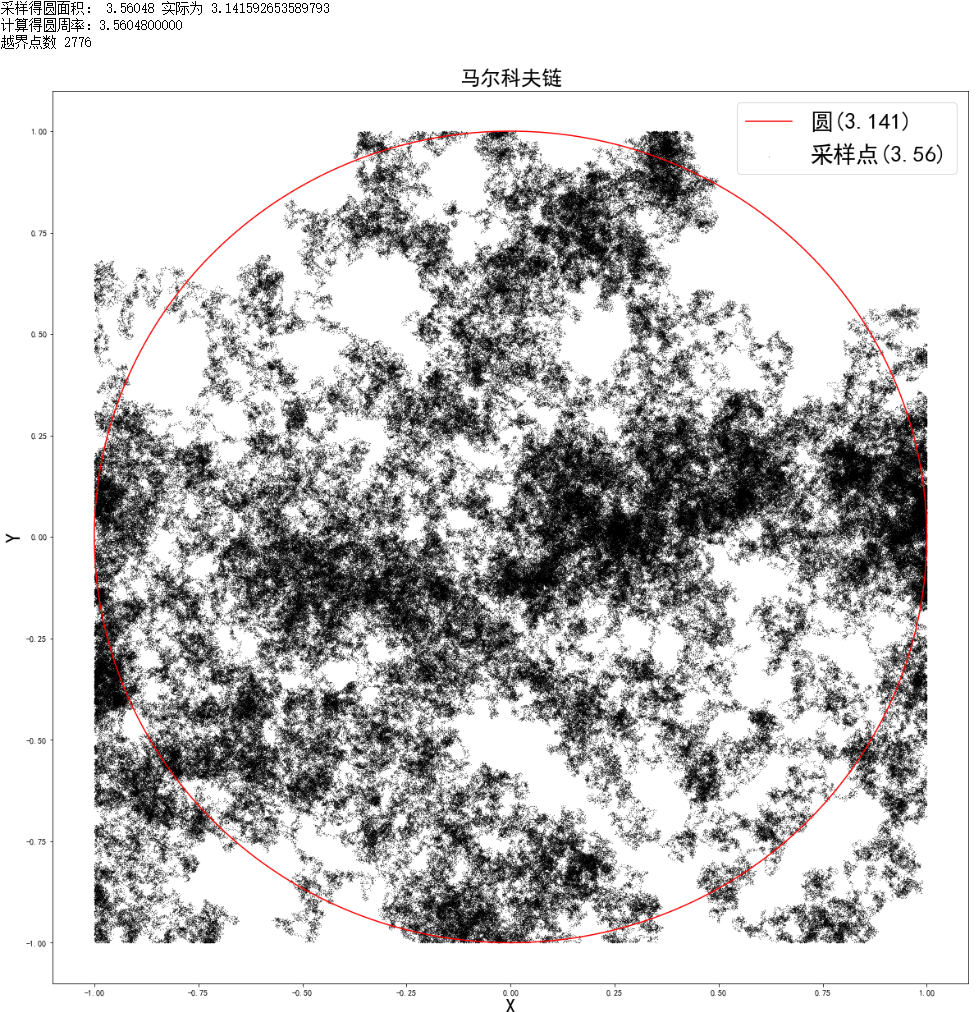

# > *`测量精度与采样数（指数） `*

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.widgets import SpanSelector
import matplotlib.gridspec as gridspec
import random

plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

def main2(R,N,s):
    random.seed()
    x=np.zeros(N)
    y=np.zeros(N)
    M=0
    for i in range(1,N):
        x[i]=random.uniform(-1,1)*s+x[i-1]
        y[i]=random.uniform(-1,1)*s+y[i-1]
        
 #         if x[i]<-R or x[i]>R:
#             x[i]=x[i-1]
#         if y[i]<-R or y[i]>R:
#             y[i]=y[i-1]
            
        if x[i]<-R or x[i]>R or y[i]<-R or y[i]>R:
            x[i]=x[i-1]
            y[i]=y[i-1]
           
            
        if x[i]**2+y[i]**2<=R**2:
            M+=1
            
    return M/N*4

def main22(R,N,s):
    xn=np.arange(1,int(np.log10(N))+1,1)
    yn=[]

    for i in range(1,len(xn)+1):
        yn.append(main2(R,10**i,s)-np.pi)
    plt.figure(figsize=(15,5))
    plt.ylim(-1.8,1.8)
    plt.bar(xn,yn,facecolor='green', edgecolor='black',width=0.1)
    plt.plot(xn,xn-xn)
    for i in range(len(xn)):
        plt.text(xn[i], yn[i]*1.4-0.2, int(yn[i]*10000)/10000, fontsize=12, horizontalalignment="center")
    plt.title("采样数与精度",size=15)
    plt.xlabel("采样数($10^N$)",size=15)
    plt.ylabel("偏差值",size=15)

  
widgets.interact(
    main22,
    R=widgets.FloatSlider(min=1,max=100,step=0.001,value=1,description="半径"),
    N=widgets.IntSlider(min=1000,max=10000000,step=1000,value=10000,description="采样数"),
    s=widgets.FloatSlider(min=0.0001,max=1,step=0.0001,readout_format='.5f',value=0.01,description="步长"),

)       

interactive(children=(FloatSlider(value=1.0, description='半径', min=1.0, step=0.001), IntSlider(value=10000, de…

<function __main__.main22(R, N, s)>

# > *`测量精度与采样数（等分） `*

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.widgets import SpanSelector
import matplotlib.gridspec as gridspec
import random

plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

def main3(R,N,s):
    random.seed()
    x=np.zeros(N)
    y=np.zeros(N)
    M=0
    for i in range(1,N):
        x[i]=random.uniform(-1,1)*s+x[i-1]
        y[i]=random.uniform(-1,1)*s+y[i-1]
        
#         if x[i]<-R or x[i]>R:
#             x[i]=x[i-1]
#         if y[i]<-R or y[i]>R:
#             y[i]=y[i-1]
            
        if x[i]<-R or x[i]>R or y[i]<-R or y[i]>R:
            x[i]=x[i-1]
            y[i]=y[i-1]
            
        if x[i]**2+y[i]**2<=R**2:
            M+=1
            
    return M/N*4
def pj(R,N1,N2,s):
    xn=np.linspace(N1,N2,150)
    yn=[]
    for i in xn:
        yn.append(main3(R,int(i),s)-np.pi)
    return yn
def main33(R,N1,N2,s,绝对值):
    xn=np.linspace(N1,N2,150)
    yn=np.zeros(len(xn))
    for i in range(1,5):
        yn=yn+pj(R,N1,N2,s)
    yn=yn/5
    plt.figure(figsize=(15,5))
#     plt.ylim(-1,1)
    if 绝对值 is True:
        plt.bar(xn[1:],abs(yn[1:]),facecolor='green', edgecolor='black',width=0.1)
    else:plt.bar(xn[1:],yn[1:],facecolor='green', edgecolor='black',width=0.1)
    plt.plot(xn,xn-xn)
#     for i in range(len(xn)):
#         plt.text(xn[i], yn[i]*1.5-0.1, int(yn[i]*10000)/10000, fontsize=12, horizontalalignment="center")
    plt.title("采样数与精度",size=15)
    plt.xlabel("采样数($N$)",size=15)
    plt.ylabel("偏差值",size=15) 
widgets.interact(
    main33,
    R=widgets.FloatSlider(min=1,max=100,step=0.001,value=1,description="半径"),
    N1=widgets.IntSlider(min=1,max=10000,step=100,value=100,description="采样数最小值"),
    N2=widgets.IntSlider(min=100,max=100000,step=100,value=1000,description="采样数最大值"),
    s=widgets.FloatSlider(min=0.0001,max=1,step=0.0001,readout_format='.5f',value=0.5,description="步长"),
    绝对值=False

)       

interactive(children=(FloatSlider(value=1.0, description='半径', min=1.0, step=0.001), IntSlider(value=100, desc…

<function __main__.main33(R, N1, N2, s, 绝对值)>

># 例图
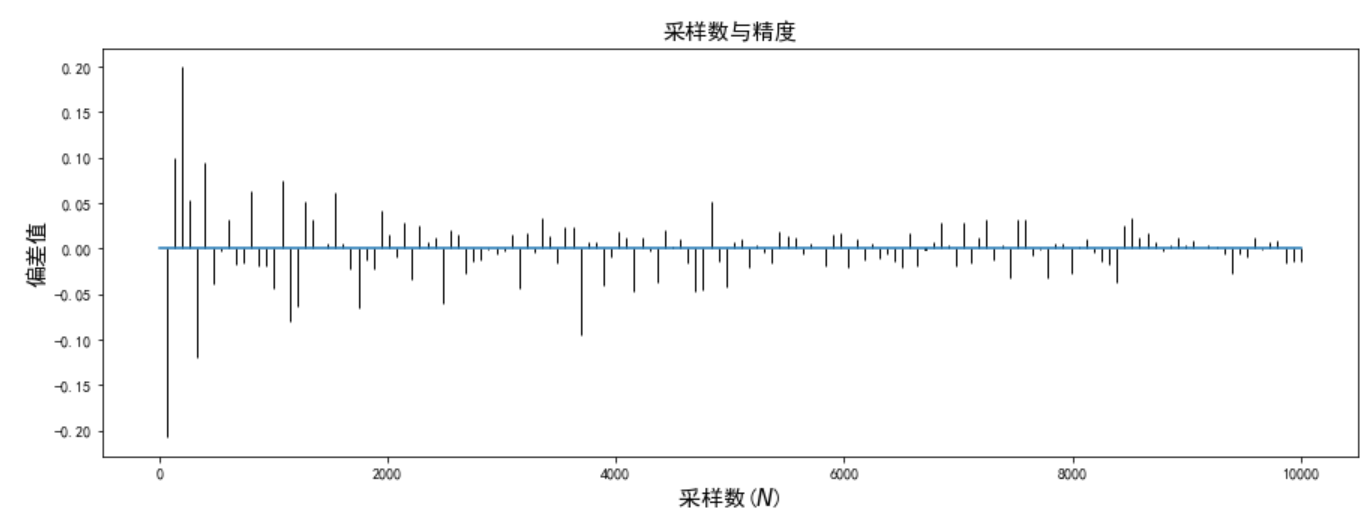
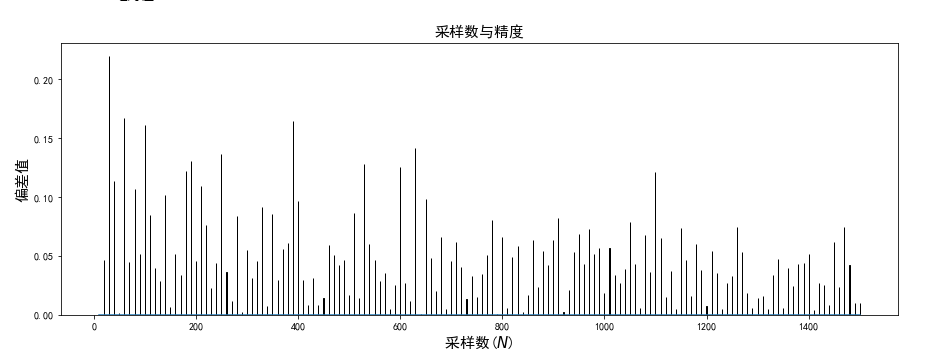
### 随N值增大精度逐渐提高，但在一定范围内呈波动态。

# > *`测量精度与步长`*

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.widgets import SpanSelector
import matplotlib.gridspec as gridspec
import random

plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

def main(R,N,s):
    random.seed()
    x=np.zeros(N)
    y=np.zeros(N)
    M=0
    for i in range(1,N):
        x[i]=random.uniform(-1,1)*s+x[i-1]
        y[i]=random.uniform(-1,1)*s+y[i-1]
        
#         if x[i]<-R or x[i]>R:
#             x[i]=x[i-1]
#         if y[i]<-R or y[i]>R:
#             y[i]=y[i-1]
            
        if x[i]<-R or x[i]>R or y[i]<-R or y[i]>R:
            x[i]=x[i-1]
            y[i]=y[i-1] 
            
        if x[i]**2+y[i]**2<=R**2:
            M+=1
            
    return M/N*4

def pj(R,N,s):
    xn=np.linspace(0,s,100)
    yn=[]
    for i in xn:
        yn.append(main(R,N,i)-np.pi)
    return yn

def main1(R,N,s,绝对值):
    xn=np.linspace(0,s,100)
    yn=np.zeros(len(xn))
    for i in range(1,5):
        yn=yn+pj(R,N,s)
    yn=yn/5
    plt.figure(figsize=(15,5))
#     plt.ylim(-1,1)
    if 绝对值 is True:
        plt.bar(xn[1:],abs(yn[1:]),facecolor='green', edgecolor='black',width=0.00001)
    else:plt.bar(xn[1:],yn[1:],facecolor='green', edgecolor='black',width=0.00001)
    plt.plot(xn,xn-xn)
#     for i in range(len(xn)):
#         plt.text(xn[i], yn[i]*1.5-0.1, int(yn[i]*10000)/10000, fontsize=12, horizontalalignment="center")
    plt.title("步长与精度",size=15)
    plt.xlabel("步长最值",size=15)
    plt.ylabel("偏差值",size=15)   
widgets.interact(
    main1,
    R=widgets.FloatSlider(min=1,max=100,step=0.001,value=1,description="半径"),
    N=widgets.IntSlider(min=1000,max=100000,step=10000,value=1000,description="采样数"),
    s=widgets.FloatSlider(min=0.0001,max=3,step=0.0001,readout_format='.5f',value=1,description="步长"),
    绝对值=False
)       

interactive(children=(FloatSlider(value=1.0, description='半径', min=1.0, step=0.001), IntSlider(value=1000, des…

<function __main__.main1(R, N, s, 绝对值)>

># 例图
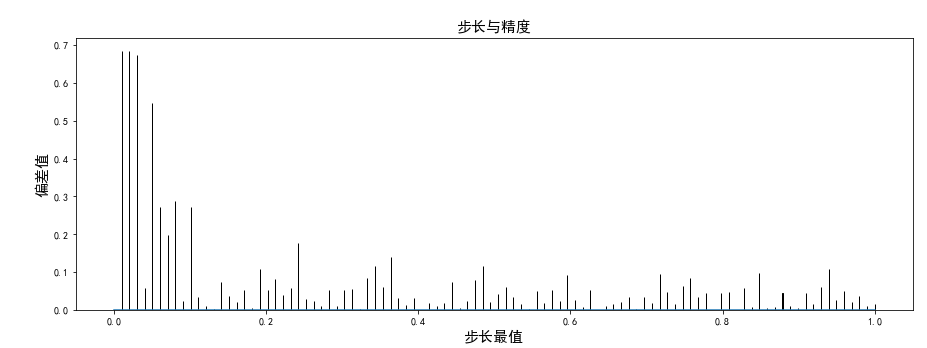
### 随步长增大精度迅速提高，但在之后范围内呈波动态，无明显提升。

---------
--------
# 三 · 周期边条下马尔科夫链计算

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.widgets import SpanSelector
import matplotlib.gridspec as gridspec
import random

plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

def main1(R,N,s):
    random.seed()
    x=np.zeros(N)
    y=np.zeros(N)
    M=0
    t=0
    S=4*R**2
    SS=int(S/4*np.pi*1000)/1000
    #绘制圆
    beta = np.arange(0,2*np.pi,0.001)
    x0=R*np.cos(beta)
    y0=R*np.sin(beta)
    plt.figure(figsize=(20,20)) 
    plt.plot(x0,y0,"r",label=f"圆({SS})")

    #采样
    for i in range(1,N):
        x[i]=random.uniform(-1,1)*s+x[i-1]
        y[i]=random.uniform(-1,1)*s+y[i-1]
        
#         if x[i]<-R or x[i]>R:
#             x[i]=x[i-1]
#         if y[i]<-R or y[i]>R:
#             y[i]=y[i-1]
            
        if x[i]<-R:
            x[i]=x[i]+2*R
            t+=1
        elif x[i]>R:
            x[i]=x[i]-2*R
            t+=1

            
        if y[i]<-R:
            y[i]=y[i]+2*R
            t+=1
        elif y[i]>R:
            y[i]=y[i]-2*R
            t+=1
            
        if x[i]**2+y[i]**2<=R**2:
            M+=1
    plt.scatter(x,y,s=0.08,c="black",label=f"采样点({int(M/N*S*1000)/1000})")
    plt.title("马尔科夫链",size=25)
    plt.xlabel("X",size=25)
    plt.ylabel("Y",size=25)

    plt.legend(loc='upper right',fontsize=28)
    print("采样得圆面积：",M/N*S,'实际为',S/4*np.pi)
    print("计算得圆周率：{0:.10f}".format(M/N*4))
    print("越界点次",t)
        
widgets.interact(
    main1,
    R=widgets.FloatSlider(min=1,max=100,step=0.001,value=1,description="半径"),
    N=widgets.IntSlider(min=1000,max=1000000,step=1000,value=10000,description="采样数"),
    s=widgets.FloatSlider(min=0.0001,max=1,step=0.0001,readout_format='.5f',value=0.5,description="步长"),

)
        

interactive(children=(FloatSlider(value=1.0, description='半径', min=1.0, step=0.001), IntSlider(value=10000, de…

<function __main__.main1(R, N, s)>

># 例图
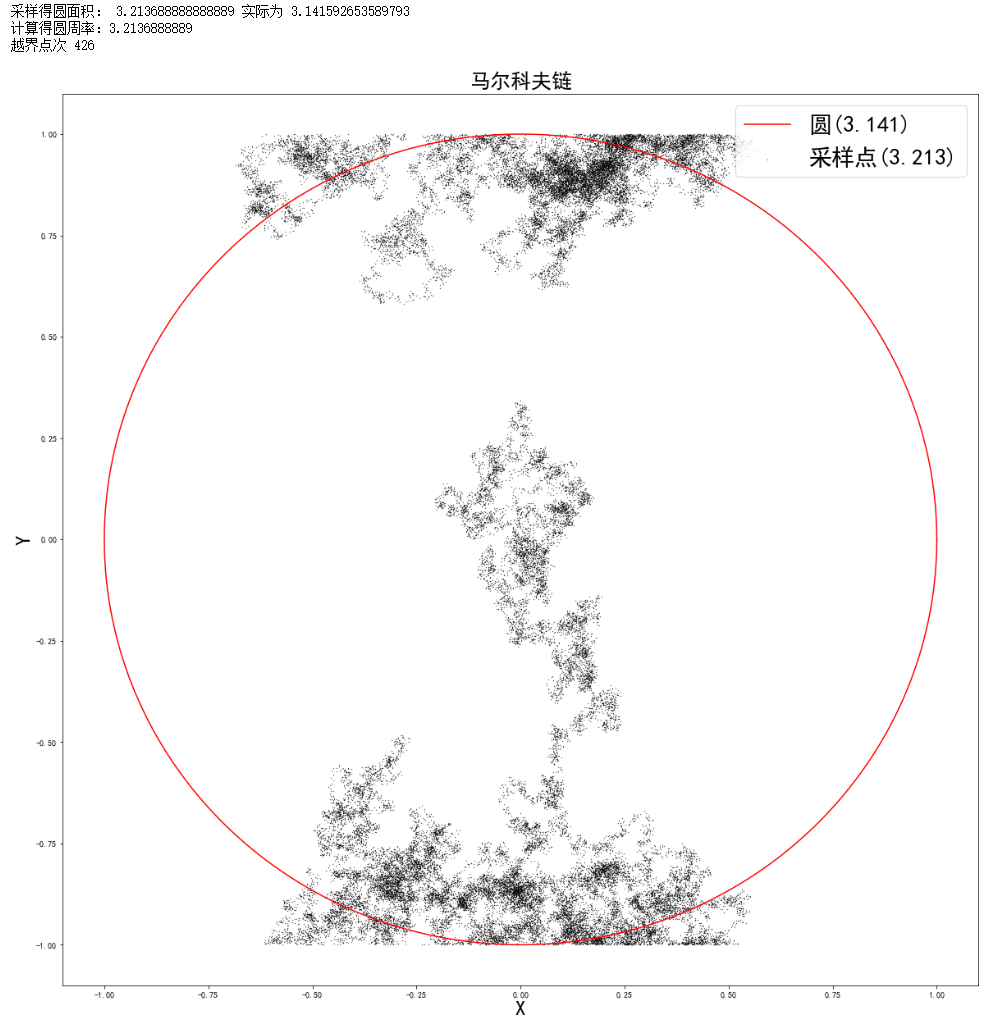

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.widgets import SpanSelector
import matplotlib.gridspec as gridspec
import random

plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

def main3(R,N,s):
    random.seed()
    x=np.zeros(N)
    y=np.zeros(N)
    M=0
    for i in range(1,N):
        x[i]=random.uniform(-1,1)*s+x[i-1]
        y[i]=random.uniform(-1,1)*s+y[i-1]
            
        if x[i]<-R:
            x[i]=x[i]+2*R
        elif x[i]>R:
            x[i]=x[i]-2*R

            
        if y[i]<-R:
            y[i]=y[i]+2*R
        elif y[i]>R:
            y[i]=y[i]-2*R
            
        if x[i]**2+y[i]**2<=R**2:
            M+=1
            
    return M/N*4

def main4(R,N,s):
    random.seed()
    x=np.zeros(N)
    y=np.zeros(N)
    M=0
    for i in range(1,N):
        x[i]=random.uniform(-1,1)*s+x[i-1]
        y[i]=random.uniform(-1,1)*s+y[i-1]
            
        if x[i]<-R or x[i]>R or y[i]<-R or y[i]>R:
            x[i]=x[i-1]
            y[i]=y[i-1] 
            
        if x[i]**2+y[i]**2<=R**2:
            M+=1
            
    return M/N*4

def pj(R,N,s):
    xn=np.linspace(1,N,150)
    yn0=[]
    yn1=[]
    for i in xn:
        yn0.append(main4(R,int(i),s)-np.pi)
        yn1.append(main3(R,int(i),s)-np.pi)
        
    return np.row_stack([yn0, yn1])# 关键点
def main33(R,N,s,绝对值):
    xn=np.linspace(1,N,150)
    yn=np.zeros(len(xn))
    for i in range(1,5):
        yn=yn+pj(R,N,s)
    yn=yn/5

    plt.figure(figsize=(15,5))
#     plt.ylim(-1,1)
    h=0
    for i in range(len(yn[0])):
        if abs(yn[1][i])<abs(yn[0][i]):
            h+=1
    h=h/len(yn[0])
    print(f"约{int(h*100000)/1000}%样本在周期边条的精度优于边界退回")
            
    if 绝对值 is True:
        plt.bar(xn[1:],abs(yn[0][1:]),facecolor='black', edgecolor='black',width=0.1,label="边界退回")
        plt.bar(xn[1:]+N/300,abs(yn[1][1:]),facecolor='r', edgecolor='r',width=0.1,label="周期边条")       
    else:
        plt.bar(xn[1:],yn[0][1:],facecolor='black', edgecolor='black',width=0.1,label="边界退回")
        plt.bar(xn[1:]+N/300,yn[1][1:],facecolor='r', edgecolor='r',width=0.1,label="周期边条")   
    plt.plot(xn,xn-xn)
#     for i in range(len(xn)):
#         plt.text(xn[i], yn[i]*1.5-0.1, int(yn[i]*10000)/10000, fontsize=12, horizontalalignment="center")
    plt.title("采样数与精度",size=15)
    plt.xlabel("采样数($N$)",size=15)
    plt.ylabel("偏差值",size=15) 
    plt.legend(loc='upper right',fontsize=18)
widgets.interact(
    main33,
    R=widgets.FloatSlider(min=1,max=100,step=0.001,value=1,description="半径"),
    N=widgets.IntSlider(min=1000,max=100000,step=1000,value=1000,description="采样数"),
    s=widgets.FloatSlider(min=0.0001,max=1,step=0.0001,readout_format='.5f',value=0.5,description="步长"),
    绝对值=False

)       

interactive(children=(FloatSlider(value=1.0, description='半径', min=1.0, step=0.001), IntSlider(value=1000, des…

<function __main__.main33(R, N, s, 绝对值)>

># 例图
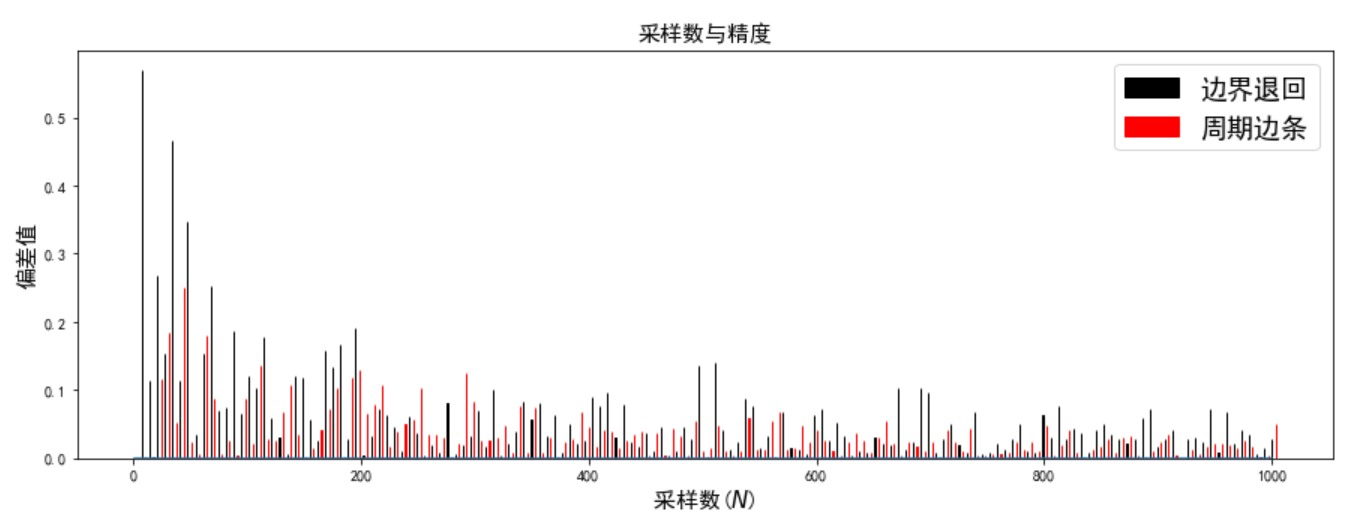
### 给定精度改变采样数，在一定程度上，周期边条的精度优于边界退回

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.widgets import SpanSelector
import matplotlib.gridspec as gridspec
import random

plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

def m1(R,N,s):
    random.seed()
    x=np.zeros(N)
    y=np.zeros(N)
    M=0
    for i in range(1,N):
        x[i]=random.uniform(-1,1)*s+x[i-1]
        y[i]=random.uniform(-1,1)*s+y[i-1]
        
#         if x[i]<-R or x[i]>R:
#             x[i]=x[i-1]
#         if y[i]<-R or y[i]>R:
#             y[i]=y[i-1]
            
        if x[i]<-R:
            x[i]=x[i]+2*R
        elif x[i]>R:
            x[i]=x[i]-2*R
            
        if y[i]<-R:
            y[i]=y[i]+2*R
        elif y[i]>R:
            y[i]=y[i]-2*R
            
        if x[i]**2+y[i]**2<=R**2:
            M+=1
            
    return M/N*4 

def m0(R,N,s):
    random.seed()
    x=np.zeros(N)
    y=np.zeros(N)
    M=0
    for i in range(1,N):
        x[i]=random.uniform(-1,1)*s+x[i-1]
        y[i]=random.uniform(-1,1)*s+y[i-1]
        
#         if x[i]<-R or x[i]>R:
#             x[i]=x[i-1]
#         if y[i]<-R or y[i]>R:
#             y[i]=y[i-1]
        if x[i]<-R or x[i]>R or y[i]<-R or y[i]>R:
            x[i]=x[i-1]
            y[i]=y[i-1]  

            
        if x[i]**2+y[i]**2<=R**2:
            M+=1
            
    return M/N*4 

def pj(R,N,s):
    xn=np.linspace(0,s,150)
    yn0=[]
    yn1=[]
    for i in xn:
        yn0.append(0.2*(m0(R,N,i)-np.pi))
        yn1.append(0.2*(m1(R,N,i)-np.pi))
#     print([yn0,yn1])
    return np.row_stack([yn0, yn1])# 关键点

def main1(R,N,s,绝对值):
    xn=np.linspace(0,s,150)
    yn0=np.zeros(len(xn))
    yn1=np.zeros(len(xn))
    yn=[yn0,yn1]
    for i in range(1,5):
        yn=yn+pj(R,N,s)

    yn=yn/5
    plt.figure(figsize=(15,5))

#     plt.ylim(-1,1)
    h=0
    for i in range(len(yn[0])):
        if abs(yn[1][i])<abs(yn[0][i]):
            h+=1
    h=h/len(yn[0])
    print(f"约{int(h*100000)/1000}%样本在周期边条的精度优于边界退回")
    if 绝对值 is True:
        plt.bar(xn[1:],abs(yn[0][1:]),facecolor='black', edgecolor='black',width=0.00001,label="边界退回")
        plt.bar(xn[1:]+s/300,abs(yn[1][1:]),facecolor='r', edgecolor='r',width=0.00001,label="周期边条")       
    else:
        plt.bar(xn[1:],yn[0][1:],facecolor='black', edgecolor='black',width=0.00001,label="边界退回")
        plt.bar(xn[1:]+s/300,yn[1][1:],facecolor='r', edgecolor='r',width=0.00001,label="周期边条")
    plt.plot(xn,xn-xn)
    plt.legend(loc='upper right',fontsize=18)
#     for i in range(len(xn)):
#         plt.text(xn[i], yn[i]*1.5-0.1, int(yn[i]*10000)/10000, fontsize=12, horizontalalignment="center")
    plt.title("步长与精度",size=15)
    plt.xlabel("步长最大值",size=15)
    plt.ylabel("偏差值",size=15)   
widgets.interact(
    main1,
    R=widgets.FloatSlider(min=1,max=100,step=0.001,value=1,description="半径"),
    N=widgets.IntSlider(min=100,max=100000,step=1000,value=1000,description="采样数"),
    s=widgets.FloatSlider(min=0.0001,max=3,step=0.0001,readout_format='.5f',value=1,description="步长"),
    绝对值=False
)       

interactive(children=(FloatSlider(value=1.0, description='半径', min=1.0, step=0.001), IntSlider(value=1000, des…

<function __main__.main1(R, N, s, 绝对值)>

> # 例图
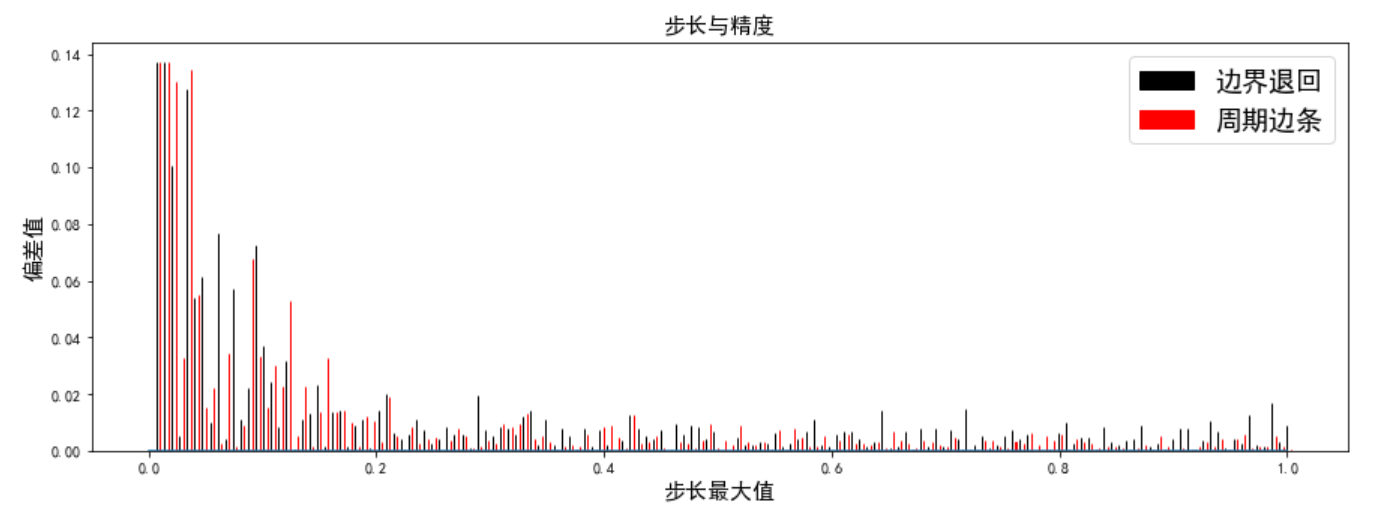
### 步长较小时，二者差别不大，接近1时周期边条较优

---------
--------
# 四 · 结语

## 鸣谢&#x1F339;&#x1F339;&#x1F339;：余超同学指出错误实现马尔可夫方法的原因。


>## 另：已将各次作业上传至[GitHub](https://github.com/HUSKYzjh/ke_xue_bian_cheng)